In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle

In [2]:
data = pd.read_csv('/content/sample_data/df_cleaned.csv')

In [3]:
data = data.dropna(subset=['cleaned'])

In [7]:
data.head()

,0,1,2,cleaned
0,2401,Borderlands,Positive,im getting borderland murder
1,2401,Borderlands,Positive,coming border kill
2,2401,Borderlands,Positive,im getting borderland kill
3,2401,Borderlands,Positive,im coming borderland murder
4,2401,Borderlands,Positive,im getting borderland murder


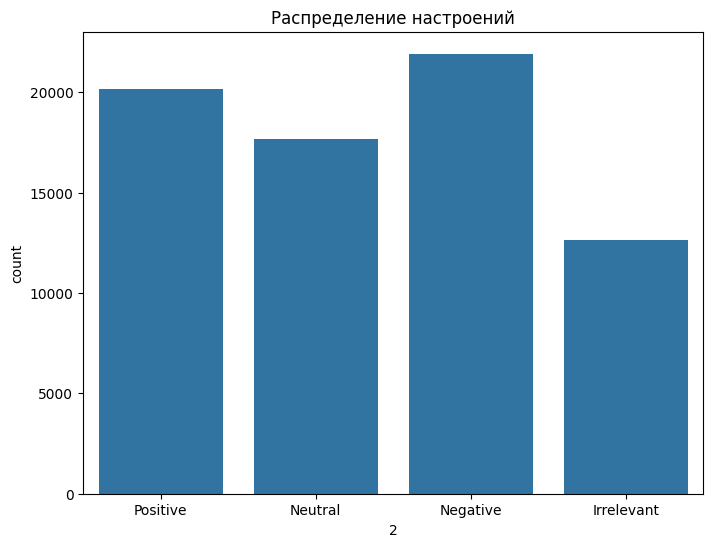

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(x='2', data=data)
plt.title('Распределение настроений')
plt.savefig('/content/sample_data/sentiment_distribution.png')
plt.show()


In [11]:
def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.tight_layout()
    plt.savefig(filename)
    plt.show()

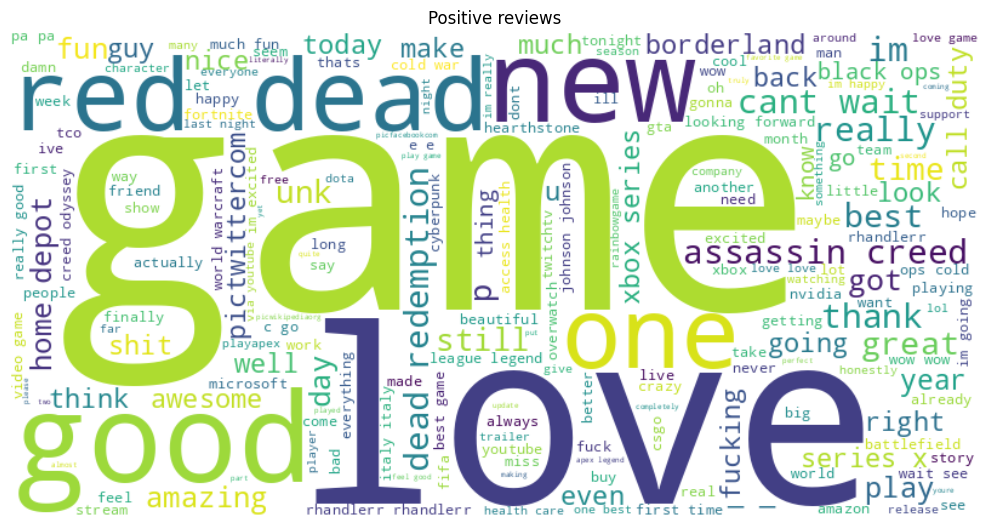

In [15]:
positive_text = ' '.join(data[data['2'] == 'Positive']['cleaned'])
generate_wordcloud(positive_text, 'Positive reviews', '/content/sample_data/positive_wordcloud.png')

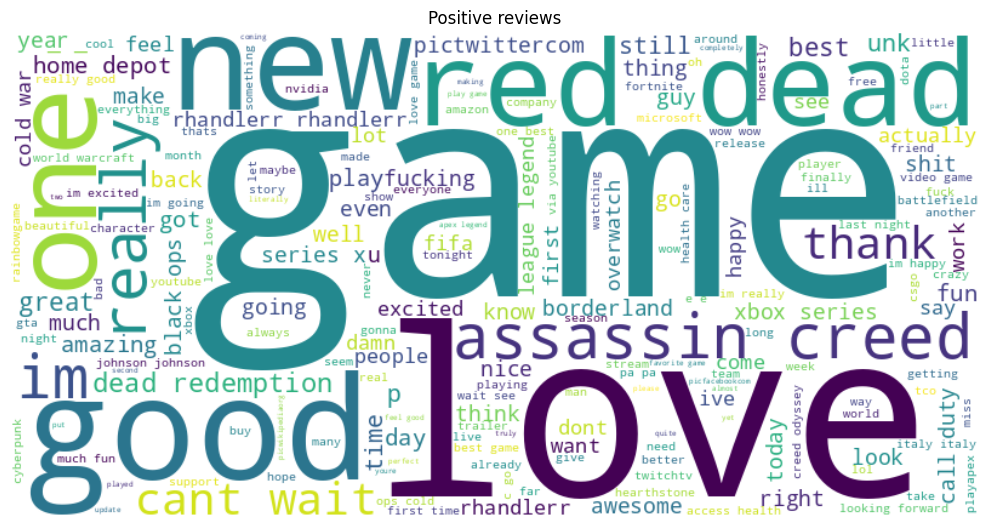

In [16]:
neutral_text = ' '.join(data[data['2'] == 'Neutral']['cleaned'])
generate_wordcloud(positive_text, 'Positive reviews', '/content/sample_data/neutral_wordcloud.png')

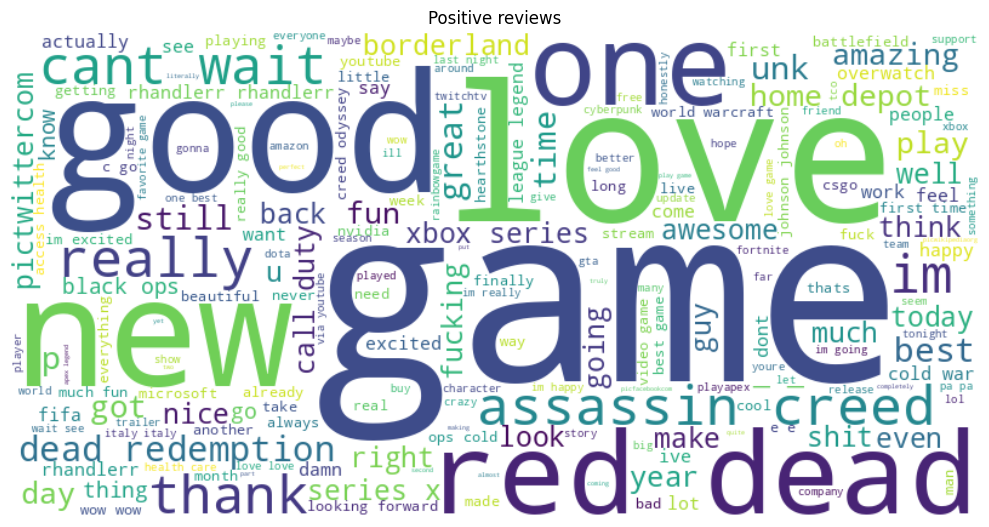

In [17]:
negative_text = ' '.join(data[data['2'] == 'Negative']['cleaned'])
generate_wordcloud(positive_text, 'Positive reviews', '/content/sample_data/negative_wordcloud.png')

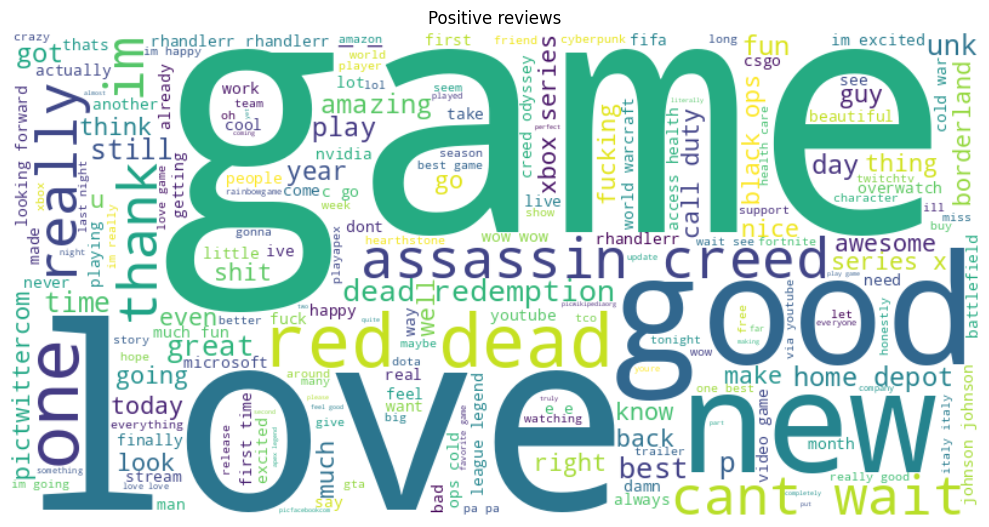

In [21]:
irrelevant_text = ' '.join(data[data['2'] == 'Irrelevant']['cleaned'])
generate_wordcloud(positive_text, 'Positive reviews', '/content/sample_data/irrelevant_wordcloud.png')

In [19]:
def get_top_words(text, n=10):
    from collections import Counter
    words = text.split()
    return Counter(words).most_common(n)

In [22]:
positive_top_words = get_top_words(positive_text)
neutral_top_words = get_top_words(neutral_text)
negative_top_words = get_top_words(negative_text)
irrelevant_top_words = get_top_words(irrelevant_text)

Text(0, 0.5, 'Word')

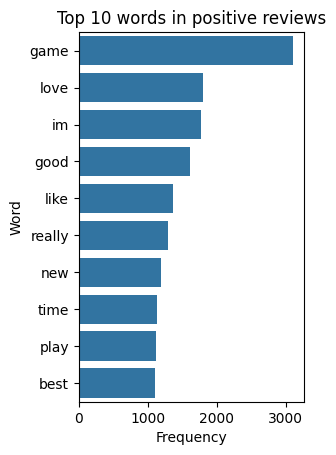

In [23]:
plt.subplot(1, 2, 1)
sns.barplot(x=[word[1] for word in positive_top_words], y=[word[0] for word in positive_top_words])
plt.title('Top 10 words in positive reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

Text(0, 0.5, 'Word')

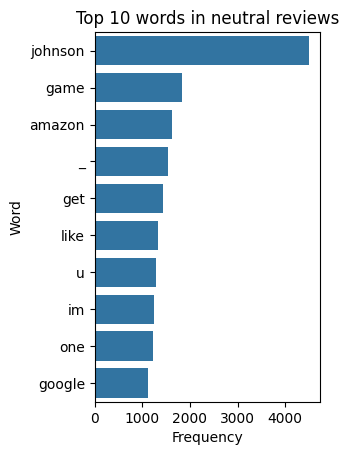

In [24]:
plt.subplot(1, 2, 2)
sns.barplot(x=[word[1] for word in negative_top_words], y=[word[0] for word in neutral_top_words])
plt.title('Top 10 words in neutral reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

Text(0, 0.5, 'Word')

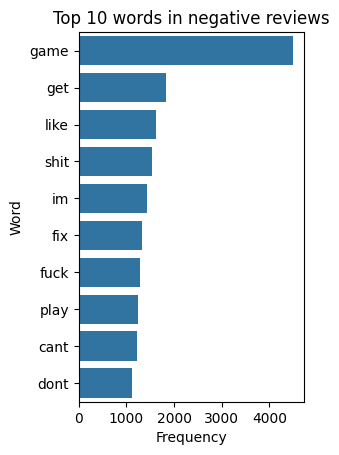

In [25]:
plt.subplot(1, 2, 2)
sns.barplot(x=[word[1] for word in negative_top_words], y=[word[0] for word in negative_top_words])
plt.title('Top 10 words in negative reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

Text(0, 0.5, 'Word')

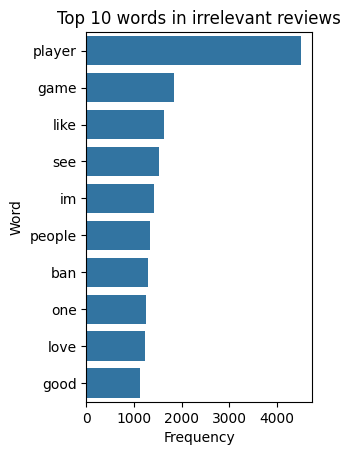

In [26]:
plt.subplot(1, 2, 2)
sns.barplot(x=[word[1] for word in negative_top_words], y=[word[0] for word in irrelevant_top_words])
plt.title('Top 10 words in irrelevant reviews')
plt.xlabel('Frequency')
plt.ylabel('Word')

In [28]:
plt.tight_layout()
plt.savefig('/content/sample_data/top_words.png')
plt.show()

<Figure size 640x480 with 0 Axes>